In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
d_f = pd.read_csv('Book-01.csv')

In [3]:
d_f.columns

Index(['Attrition', 'Business Travel', 'CF_age band', 'CF_attrition label',
       'Department', 'Education Field', 'Employee Number', 'Gender',
       'Job Role', 'Marital Status', 'Over Time', 'Training Times Last Year',
       'Age', 'CF_attrition count', 'CF_attrition rate', 'CF_current Employee',
       'Daily Rate', 'Distance From Home', 'Education',
       'Environment Satisfaction', 'Hourly Rate', 'Job Involvement',
       'Job Level', 'Job Satisfaction', 'Monthly Income', 'Monthly Rate',
       'Num Companies Worked', 'Percent Salary Hike', 'Performance Rating',
       'Relationship Satisfaction', 'Standard Hours', 'Stock Option Level',
       'Total Working Years', 'Work Life Balance', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Curr Manager'],
      dtype='object')

In [4]:
X = d_f[['Distance From Home','Years At Company']]

In [5]:
X.head()

,Distance From Home,Years At Company
0,1,6
1,8,10
2,2,0
3,3,8
4,2,2


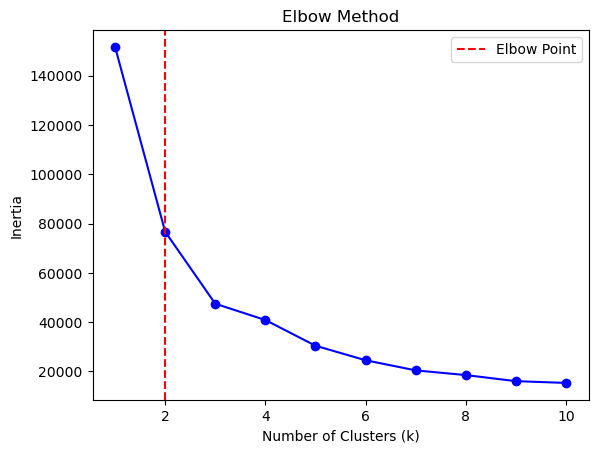

The best number of clusters based on the Elbow Method is: 2


In [6]:
# Perform K-means clustering for different values of k
k_values = range(1, 11)  # Test k from 1 to 10
inertias = []  # List to store the inertia values

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Find the elbow point
diff = [inertias[i] - inertias[i+1] for i in range(len(inertias)-1)]
best_k = diff.index(max(diff)) + 2

# Add a vertical line to indicate the elbow point
plt.axvline(x=best_k, color='r', linestyle='--', label='Elbow Point')

plt.legend()
plt.show()

print("The best number of clusters based on the Elbow Method is:", best_k)

In [7]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [8]:
# Get the predicted cluster labels for each data point
labels = kmeans.labels_

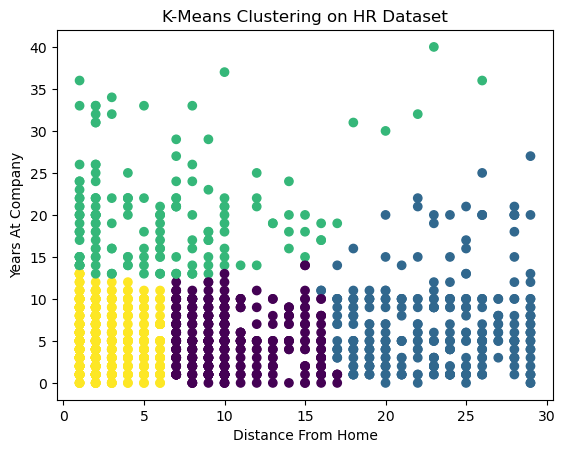

In [9]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.xlabel("Distance From Home")
plt.ylabel("Years At Company")
plt.title('K-Means Clustering on HR Dataset')
plt.show()

In [10]:
d_f['labels'] = labels

<Axes: xlabel='labels', ylabel='Years At Company'>

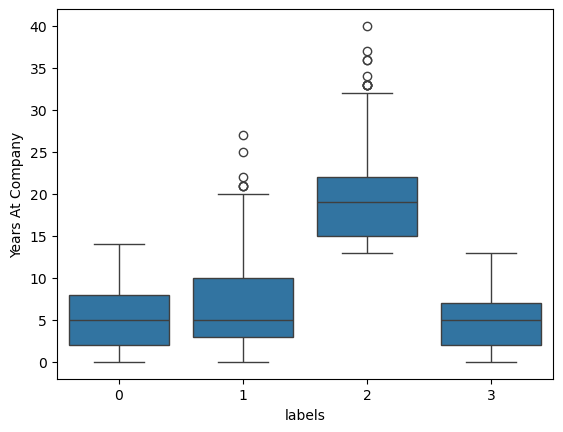

In [11]:
sns.boxplot(x='labels', y='Years At Company', data=d_f)

In [12]:
d_f['labels'].value_counts()

labels
3    593
0    426
1    289
2    162
Name: count, dtype: int64